# Find lane lines advanced



In [1]:
%load_ext autoreload
%autoreload 2

root_folder = './'

import sys 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import importlib

sys.path.append(root_folder + 'src/')

from camera import camera
from gradient import gradient

%matplotlib inline

# Initialize camera
cam = camera(root_folder + 'camera_cal/calibration*.jpg')



In [2]:
from lane_detector import lane_detector

# Initialize gradient
grad = gradient(
    direction=(1, 15, 0.7, 1.3),  
    magnitude=(1, 15, 30, 150), 
    sobelx=(2, 5, 20, 100), 
    sobely=(2, 5, 20, 100))

# Calibrate the camera
cam.calibrate()



Sliding window
Left =>
Right =>
Around poly
Around poly
Left =>
Right =>


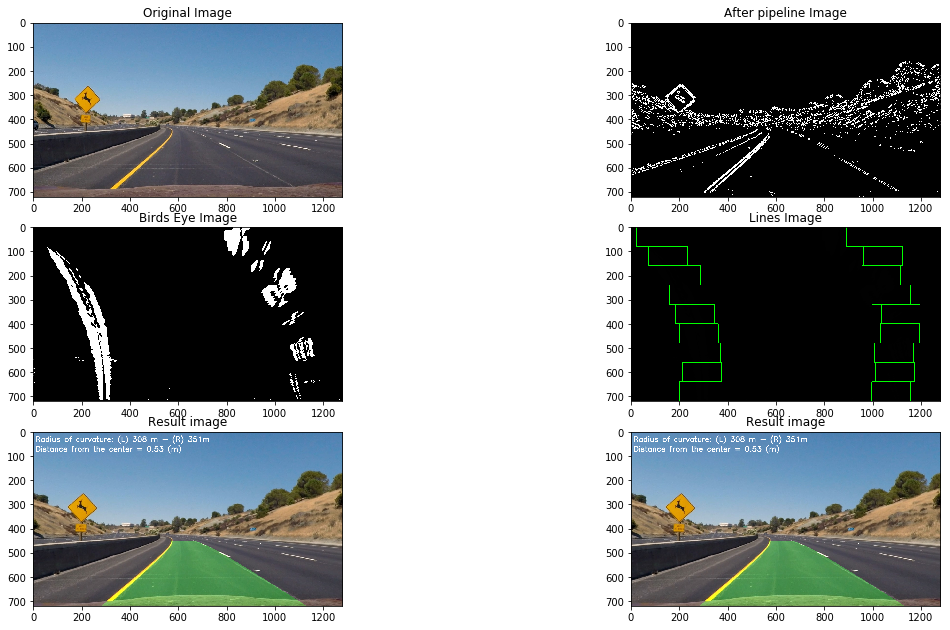

In [21]:
detector = lane_detector(camera = cam, gradient = grad, debug = True)

# import test image
# test1 = mpimg.imread(root_folder + 'test_images/test2.jpg')
test1 = mpimg.imread(root_folder + 'test_images/test2.jpg')

detector.reset()
# lanes = detector.find_lanes(test1)
lanes = detector.find_lanes(test1)
lanes = detector.find_lanes(test1)

# Show original and warped image
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 9))
f.tight_layout()
ax1.imshow(test1)
ax1.set_title('Original Image', fontsize=12)

ax2.imshow(detector.filtered_image, cmap="gray")
ax2.set_title('After pipeline Image', fontsize=12)

ax3.imshow(detector.birds_eyed_image, cmap="gray")
ax3.set_title('Birds Eye Image', fontsize=12)

ax4.imshow(detector.current_lanes)
ax4.set_title('Lines Image', fontsize=12)

ax5.imshow(lanes)
ax5.set_title('Result image', fontsize=12)

ax6.imshow(lanes)
ax6.set_title('Result image', fontsize=12)

cv2.imwrite(root_folder + 'examples/output.jpg', cv2.cvtColor(cv2.resize(lanes, (640,320)), cv2.COLOR_BGR2RGB))

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Find lanes on a video 

First import everything needed to edit/save/watch video clips


In [11]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML


### Project video

Now I'll apply the detector class to process an entire video 

In [23]:

detector = lane_detector(camera = cam, gradient = grad, debug = False)

detector.reset()

def process_image(image):

    result = detector.find_lanes(image)
    return result

output_video = root_folder + 'test_videos_output/project_video.mp4'

clip = VideoFileClip(root_folder + 'project_video.mp4')

output_clip = clip.fl_image(process_image)
%time output_clip.write_videofile(output_video, audio=False)

print(detector.left_line.all_losted_iterations)
print(detector.right_line.all_losted_iterations)

# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# frame = clip.get_frame(0)
# f = frame[:,:,:3]
# print(f.shape)
# plt.imshow(f)
# cv2.imwrite(root_folder + "test_images/project_test2.jpg", cv2.cvtColor(f, cv2.COLOR_RGB2BGR))

[MoviePy] >>>> Building video ./test_videos_output/project_video.mp4
[MoviePy] Writing video ./test_videos_output/project_video.mp4


100%|█████████▉| 1260/1261 [08:39<00:00,  2.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test_videos_output/project_video.mp4 

CPU times: user 5min 10s, sys: 1min 21s, total: 6min 31s
Wall time: 8min 42s
73
346


### Challenge video



In [49]:
detector = lane_detector(camera = cam, gradient = grad, debug = False)

detector.reset()

output_video = root_folder + 'test_videos_output/challenge_video.mp4'

clip2 = VideoFileClip(root_folder + 'challenge_video.mp4').subclip(0,5)
output_clip = clip2.fl_image(process_image)
%time output_clip.write_videofile(output_video, audio=False)

[autoreload of lane_detector failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "./src/lane_detector.py", line 128
    if self.debug == True
         

[MoviePy] >>>> Building video ./test_videos_output/challenge_video.mp4
[MoviePy] Writing video ./test_videos_output/challenge_video.mp4


100%|██████████| 150/150 [00:58<00:00,  2.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test_videos_output/challenge_video.mp4 

CPU times: user 36.1 s, sys: 10.2 s, total: 46.2 s
Wall time: 1min 2s
